## 1- Problem Definition: 
#### to analyse data related to covid-19 and gain insights

## 2- Data 
#### Downlaod dataset from:
https://ourworldindata.org/covid-cases
#### Data is in CSV format.

In [2]:
# import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

## 3- load the data from csv file into a dataframe

In [4]:
df = pd.read_csv(r'C:\Users\ms\PycharmProjects\DS - karan/owid-covid-data.csv')

In [5]:
# display the dataframe

In [6]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365560,ZWE,Africa,Zimbabwe,2023-12-15,265975.0,0.0,0.0,5730.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
365561,ZWE,Africa,Zimbabwe,2023-12-16,265975.0,0.0,0.0,5730.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
365562,ZWE,Africa,Zimbabwe,2023-12-17,265975.0,0.0,0.0,5730.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
365563,ZWE,Africa,Zimbabwe,2023-12-18,265975.0,0.0,0.0,5730.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [8]:
# I don't need all of columns, therefor I filter them - Analysis based on Countries, so I don't need Continent

In [9]:
df=df[['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'cardiovasc_death_rate', 'new_deaths', 'total_tests','new_tests', 'population_density']]

In [10]:
df

,location,date,total_cases,new_cases,total_deaths,cardiovasc_death_rate,new_deaths,total_tests,new_tests,population_density
0,Afghanistan,2020-01-03,NaN,0.0,NaN,597.029,0.0,NaN,NaN,54.422
1,Afghanistan,2020-01-04,NaN,0.0,NaN,597.029,0.0,NaN,NaN,54.422
2,Afghanistan,2020-01-05,NaN,0.0,NaN,597.029,0.0,NaN,NaN,54.422
3,Afghanistan,2020-01-06,NaN,0.0,NaN,597.029,0.0,NaN,NaN,54.422
4,Afghanistan,2020-01-07,NaN,0.0,NaN,597.029,0.0,NaN,NaN,54.422
...,...,...,...,...,...,...,...,...,...,...
365560,Zimbabwe,2023-12-15,265975.0,0.0,5730.0,307.846,0.0,NaN,NaN,42.729
365561,Zimbabwe,2023-12-16,265975.0,0.0,5730.0,307.846,0.0,NaN,NaN,42.729
365562,Zimbabwe,2023-12-17,265975.0,0.0,5730.0,307.846,0.0,NaN,NaN,42.729
365563,Zimbabwe,2023-12-18,265975.0,0.0,5730.0,307.846,0.0,NaN,NaN,42.729


## 4- Data Expolation

In [11]:
# Row and column count

In [12]:
df.shape

(365565, 10)

In [13]:
# view the first few rows

In [14]:
df.head()

,location,date,total_cases,new_cases,total_deaths,cardiovasc_death_rate,new_deaths,total_tests,new_tests,population_density
0,Afghanistan,2020-01-03,NaN,0.0,NaN,597.029,0.0,NaN,NaN,54.422
1,Afghanistan,2020-01-04,NaN,0.0,NaN,597.029,0.0,NaN,NaN,54.422
2,Afghanistan,2020-01-05,NaN,0.0,NaN,597.029,0.0,NaN,NaN,54.422
3,Afghanistan,2020-01-06,NaN,0.0,NaN,597.029,0.0,NaN,NaN,54.422
4,Afghanistan,2020-01-07,NaN,0.0,NaN,597.029,0.0,NaN,NaN,54.422


In [15]:
# in the first sight, there is not enough infromation about the first days of 2020

In [16]:
# view the last few rows

In [17]:
df.tail()

,location,date,total_cases,new_cases,total_deaths,cardiovasc_death_rate,new_deaths,total_tests,new_tests,population_density
365560,Zimbabwe,2023-12-15,265975.0,0.0,5730.0,307.846,0.0,NaN,NaN,42.729
365561,Zimbabwe,2023-12-16,265975.0,0.0,5730.0,307.846,0.0,NaN,NaN,42.729
365562,Zimbabwe,2023-12-17,265975.0,0.0,5730.0,307.846,0.0,NaN,NaN,42.729
365563,Zimbabwe,2023-12-18,265975.0,0.0,5730.0,307.846,0.0,NaN,NaN,42.729
365564,Zimbabwe,2023-12-19,265975.0,0.0,5730.0,307.846,0.0,NaN,NaN,42.729


In [18]:
# check basic statistics for numeric columns

In [19]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [20]:
df.describe()

,total_cases,new_cases,total_deaths,cardiovasc_death_rate,new_deaths,total_tests,new_tests,population_density
count,327216.00,355673.00,305512.00,283647.00,355720.00,79387.00,75403.00,310452.00
mean,6993867.09,9208.80,87712.39,264.30,81.97,21104573.94,67285.41,399.68
std,42174362.17,107918.80,447193.20,120.90,623.05,84098694.31,247734.00,1822.95
min,1.00,0.00,1.00,79.37,0.00,0.00,1.00,0.14
25%,8702.00,0.00,130.00,175.69,0.00,364654.00,2244.00,37.73
50%,73776.00,1.00,1361.00,245.47,0.00,2067330.00,8783.00,90.67
75%,809265.00,228.00,12031.00,333.44,2.00,10248451.50,37229.00,222.87
max,772837981.00,8401963.00,6988666.00,724.42,57167.00,9214000000.00,35855632.00,20546.77


In [21]:
# check the concise summary of the DataFrame, including the data types and non-null counts of each column.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365565 entries, 0 to 365564
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   location               365565 non-null  object 
 1   date                   365565 non-null  object 
 2   total_cases            327216 non-null  float64
 3   new_cases              355673 non-null  float64
 4   total_deaths           305512 non-null  float64
 5   cardiovasc_death_rate  283647 non-null  float64
 6   new_deaths             355720 non-null  float64
 7   total_tests            79387 non-null   float64
 8   new_tests              75403 non-null   float64
 9   population_density     310452 non-null  float64
dtypes: float64(8), object(2)
memory usage: 27.9+ MB


In [23]:
# Check for missing values - shows the total count of null values fo each column

In [24]:
df.isnull().sum()

location                      0
date                          0
total_cases               38349
new_cases                  9892
total_deaths              60053
cardiovasc_death_rate     81918
new_deaths                 9845
total_tests              286178
new_tests                290162
population_density        55113
dtype: int64

In [25]:
# Total_tests and new_test have the most missing values, I think the best approach is to drop the missing values
# since it is not a good idea to producre the missing values

## 5. Data Cleaning

In [26]:
# first convert date column from object to date type

In [27]:
df['date'] = pd.to_datetime(df['date'])

C:\Users\ms\AppData\Local\Temp\ipykernel_6208\3532345252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [28]:
# clean the missing values

In [29]:
# continent: fill the missing values with map to country - this part is not necessary for my analysis

In [30]:
# total_cases

In [31]:
pd.set_option('display.expand_frame_repr', False)
missing_values_rows = df[df['total_cases'].isnull()]
print(missing_values_rows)

           location       date  total_cases  new_cases  total_deaths  cardiovasc_death_rate  new_deaths  total_tests  new_tests  population_density
0       Afghanistan 2020-01-03          NaN       0.00           NaN                 597.03        0.00          NaN        NaN               54.42
1       Afghanistan 2020-01-04          NaN       0.00           NaN                 597.03        0.00          NaN        NaN               54.42
2       Afghanistan 2020-01-05          NaN       0.00           NaN                 597.03        0.00          NaN        NaN               54.42
3       Afghanistan 2020-01-06          NaN       0.00           NaN                 597.03        0.00          NaN        NaN               54.42
4       Afghanistan 2020-01-07          NaN       0.00           NaN                 597.03        0.00          NaN        NaN               54.42
...             ...        ...          ...        ...           ...                    ...         ...         

In [32]:
# the total_cases missing values are related to the first months of 2020, the best approach is to delete them.

In [33]:
df.dropna(subset=['total_cases'], inplace=True)

C:\Users\ms\AppData\Local\Temp\ipykernel_6208\1271523696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['total_cases'], inplace=True)


In [34]:
df.isnull().sum()

location                      0
date                          0
total_cases                   0
new_cases                   288
total_deaths              21726
cardiovasc_death_rate     64302
new_deaths                  242
total_tests              249118
new_tests                252985
population_density        41509
dtype: int64

In [35]:
# we can see that the number of missing values in death related variables is less than before.

In [36]:
# total_deaths, cardiovasc_death_rate

In [37]:
# I want to compare diffrent country total deaths during the time, therefore I use total_deaths column - based on the suggestion I use the cardiovasc_death_rate which is the normilized total_death rate based on population
# I realized that there is another column in dataset which shows cardiovasc_death_rate and it is 
# a measure of the number of deaths per unit of population due to cardiovascular diseases over a specific period.
# Since I don't know it is based on which period, but I want to compare diffrent countries based just this variable, I use it here.

In [38]:
missing_values_rows = df[df['cardiovasc_death_rate'].isnull()]
print(missing_values_rows)

                 location       date  total_cases  new_cases  total_deaths  cardiovasc_death_rate  new_deaths  total_tests  new_tests  population_density
1491               Africa 2020-02-16         1.00       1.00           NaN                    NaN        0.00          NaN        NaN                 NaN
1492               Africa 2020-02-17         1.00       0.00           NaN                    NaN        0.00          NaN        NaN                 NaN
1493               Africa 2020-02-18         1.00       0.00           NaN                    NaN        0.00          NaN        NaN                 NaN
1494               Africa 2020-02-19         1.00       0.00           NaN                    NaN        0.00          NaN        NaN                 NaN
1495               Africa 2020-02-20         1.00       0.00           NaN                    NaN        0.00          NaN        NaN                 NaN
...                   ...        ...          ...        ...           ...  

In [39]:
# first remove the missing values in cardiovasc_death_rate

In [40]:
df_cardiovasc_death_rate = df.dropna(subset=['cardiovasc_death_rate'])

In [41]:
df_cardiovasc_death_rate.isnull().sum()

location                      0
date                          0
total_cases                   0
new_cases                   279
total_deaths              11865
cardiovasc_death_rate         0
new_deaths                  238
total_tests              185833
new_tests                189466
population_density         2719
dtype: int64

In [42]:
# Group by country and calculate the total deaths for each country
total_deaths_by_country = df_cardiovasc_death_rate.groupby('location')['cardiovasc_death_rate'].sum().reset_index()

# Sort the DataFrame by total deaths in descending order for better comparison
total_deaths_by_country = total_deaths_by_country.sort_values(by='cardiovasc_death_rate', ascending=False)

# Select the top 30 countries
top_30_countries = total_deaths_by_country.head(30)

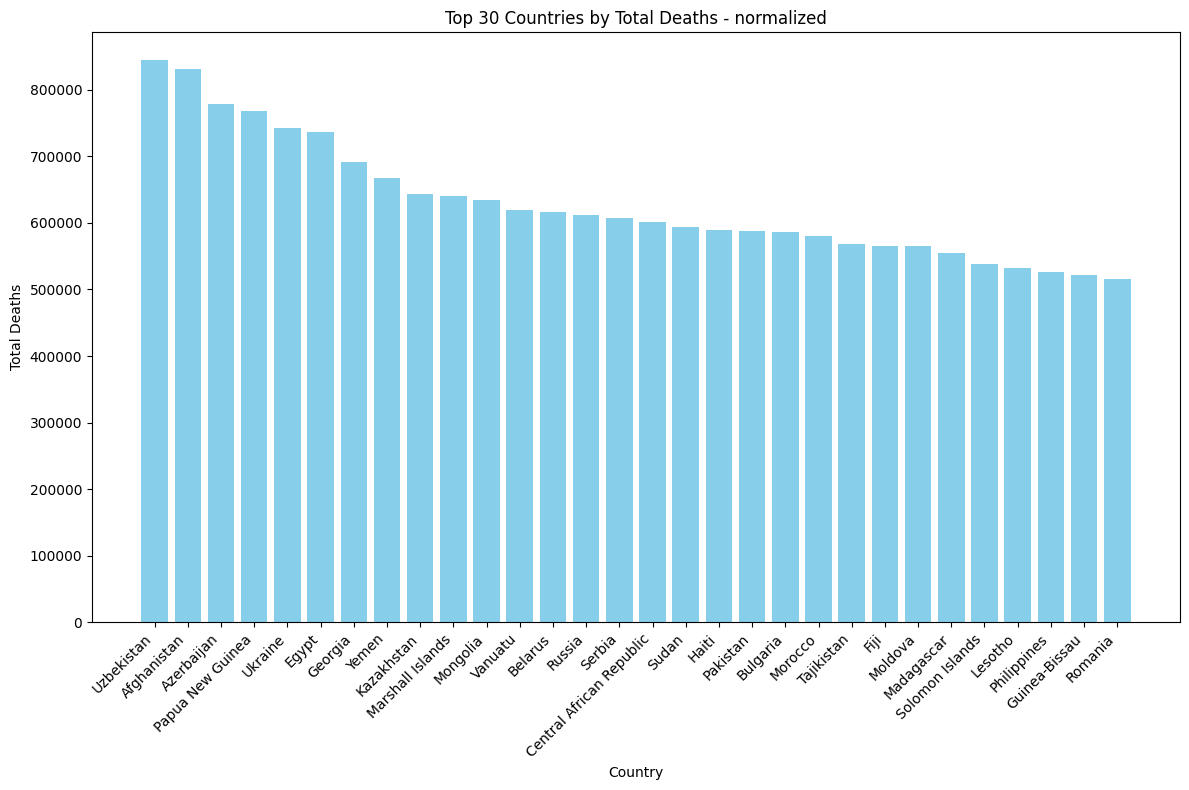

In [43]:
# Plot a bar chart for the top 30 countries
plt.figure(figsize=(12, 8))
plt.bar(top_30_countries['location'], top_30_countries['cardiovasc_death_rate'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.title('Top 30 Countries by Total Deaths - normalized')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better display
plt.show()

In [44]:
# I dont need the values related to Continents and the world, therefor I filter the values

In [45]:
values_to_exclude = ['World', 'High income', 'Upper middle income', 'Europe', 'North America', 'Asia', 'South America', 'Lower middle income', 'European Union']
df_filtered = df_cardiovasc_death_rate[~df_cardiovasc_death_rate['location'].isin(values_to_exclude)]

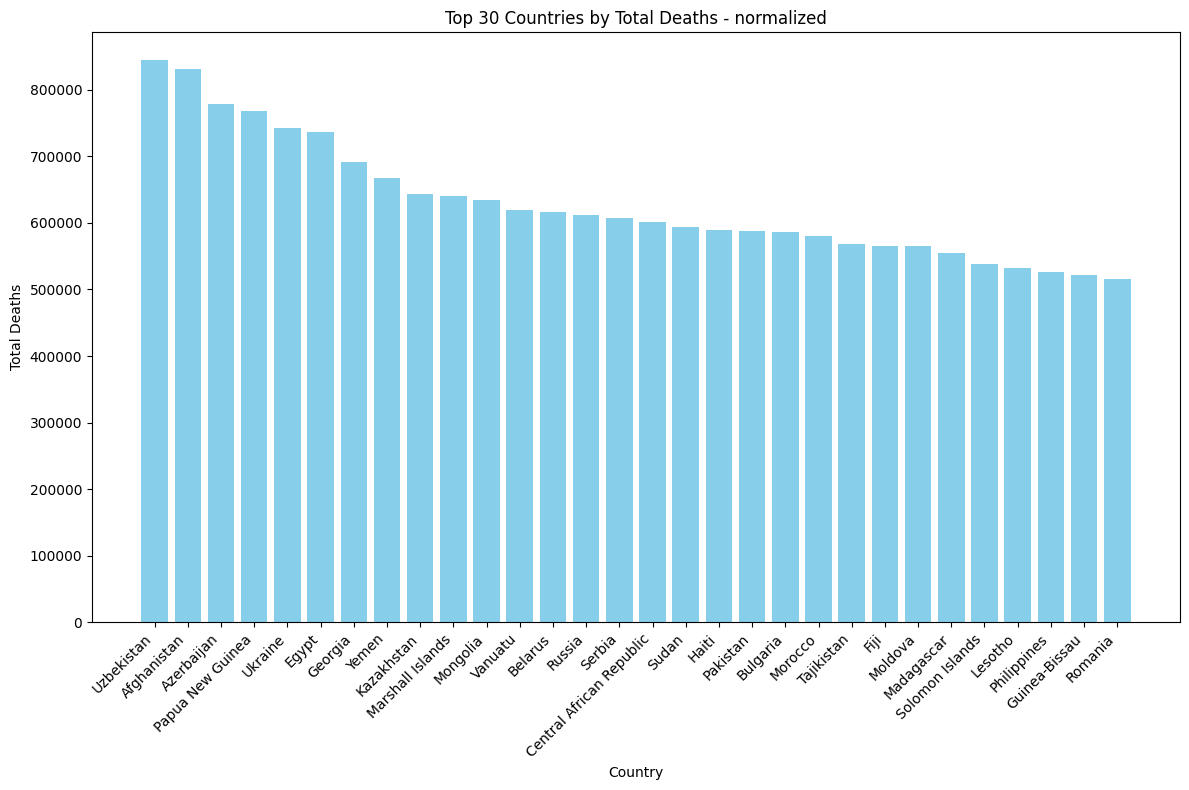

In [46]:
# Group by country and calculate the total deaths for each country
total_deaths_by_country = df_filtered.groupby('location')['cardiovasc_death_rate'].sum().reset_index()
# Sort the DataFrame by total deaths in descending order for better comparison
total_deaths_by_country = total_deaths_by_country.sort_values(by='cardiovasc_death_rate', ascending=False)
# Select the top 30 countries
top_30_countries = total_deaths_by_country.head(30)
# Plot a bar chart for the top 30 countries
plt.figure(figsize=(12, 8))
plt.bar(top_30_countries['location'], top_30_countries['cardiovasc_death_rate'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.title('Top 30 Countries by Total Deaths - normalized')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better display
plt.show()

In [47]:
# top 10 countries with more recent new deathas

In [48]:
# first remove the missing values from new_deaths

In [49]:
df_new_deaths = df.dropna(subset=['new_deaths'])

In [50]:
values_to_exclude = ['World', 'High income', 'Upper middle income', 'Europe', 'North America', 'Asia', 'South America', 'Lower middle income', 'European Union']
df_filtered = df_new_deaths[~df_new_deaths['location'].isin(values_to_exclude)]
df_filtered = df_filtered[df_filtered['new_deaths'] > 0]

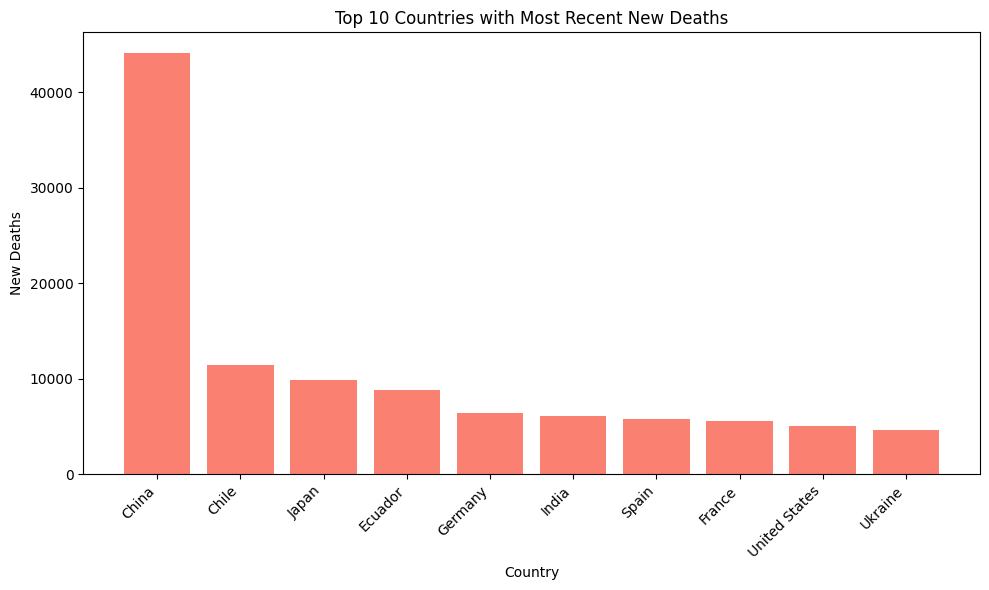

In [51]:
# new approach: sort just by new_deaths and extract the contries with more new_deaths, 
# sorting by date doesnt result in 10 or more, since for a certain date (last_date) there is just data for 4 countries

sorted_df = df_filtered.sort_values(by='new_deaths', ascending=False)
unique_values_df = sorted_df.drop_duplicates(subset='location')
top_10_countries = unique_values_df.head(10)


# Plot a bar chart for the top 10 countries with the most recent new deaths
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries['location'], top_10_countries['new_deaths'], color='salmon')
plt.xlabel('Country')
plt.ylabel('New Deaths')
plt.title('Top 10 Countries with Most Recent New Deaths')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## exploratory analysis

In [52]:
# how different countries have managed to flatten their curve - a time-series analysis

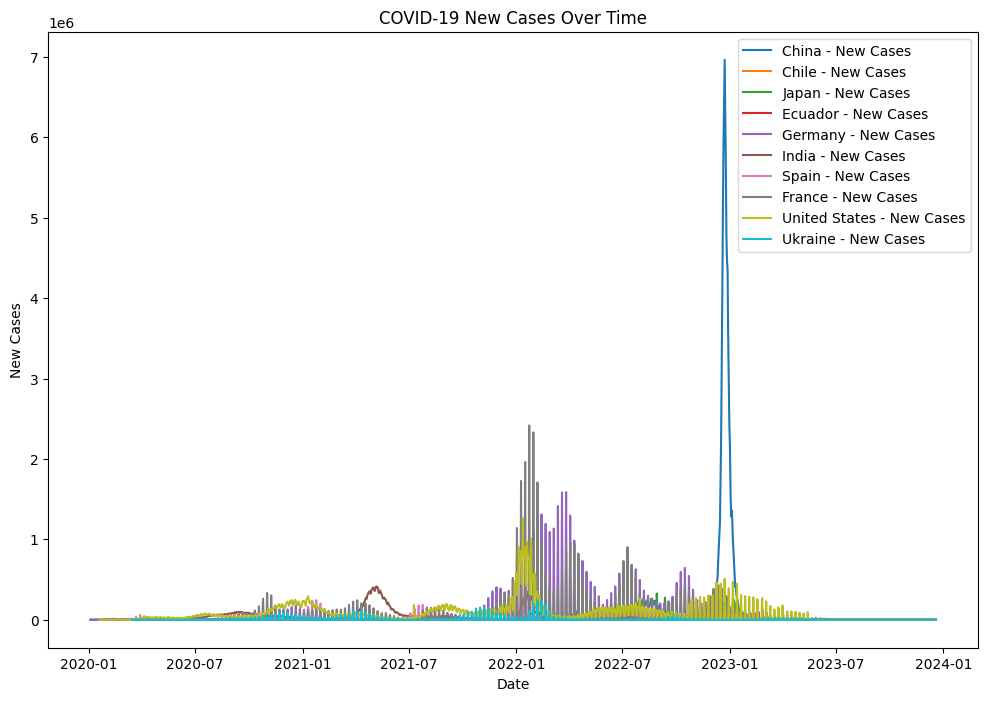

In [53]:
# Group by 'date' and aggregate metrics
# ??? should I drop th missing values here?
df_filtered = df[~df['location'].isin(values_to_exclude)]
grouped_data = df_filtered.groupby(['date', 'location']).agg({
    'new_cases': 'sum',
    'total_cases': 'max',
    'new_deaths': 'sum',
    'total_deaths': 'max'
}).reset_index()

# Plotting time-series data for specific countries
countries_of_interest = ['China', 'Chile', 'Japan', 'Ecuador', 'Germany', 'India', 'Spain', 'France', 'United States', 'Ukraine']

plt.figure(figsize=(12, 8))

for country in countries_of_interest:
    country_data = grouped_data[grouped_data['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=f'{country} - New Cases')

plt.title('COVID-19 New Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.show()

In [54]:
# The same above analysis based on normalized data

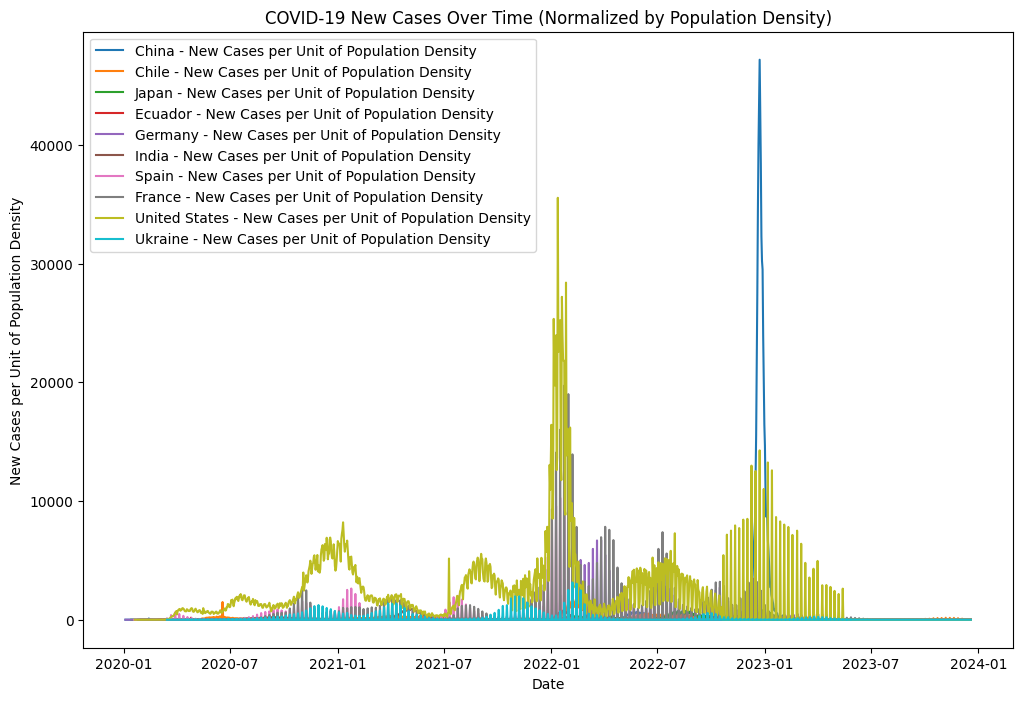

In [55]:
# Group by 'date' and aggregate metrics
df_filtered = df[~df['location'].isin(values_to_exclude)]
grouped_data = df_filtered.groupby(['date', 'location']).agg({
    'new_cases': 'sum',
    'total_cases': 'max',
    'new_deaths': 'sum',
    'total_deaths': 'max',
    'population_density': 'max'
}).reset_index()

# Normalize data using population density
grouped_data['new_cases_normalized'] = grouped_data['new_cases'] / grouped_data['population_density']

# Plotting time-series data for specific countries
countries_of_interest = ['China', 'Chile', 'Japan', 'Ecuador', 'Germany', 'India', 'Spain', 'France', 'United States', 'Ukraine']

plt.figure(figsize=(12, 8))

for country in countries_of_interest:
    country_data = grouped_data[grouped_data['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases_normalized'], label=f'{country} - New Cases per Unit of Population Density')

plt.title('COVID-19 New Cases Over Time (Normalized by Population Density)')
plt.xlabel('Date')
plt.ylabel('New Cases per Unit of Population Density')
plt.legend()
plt.show()

In [56]:
# The relationship between testing rates and confirmed cases

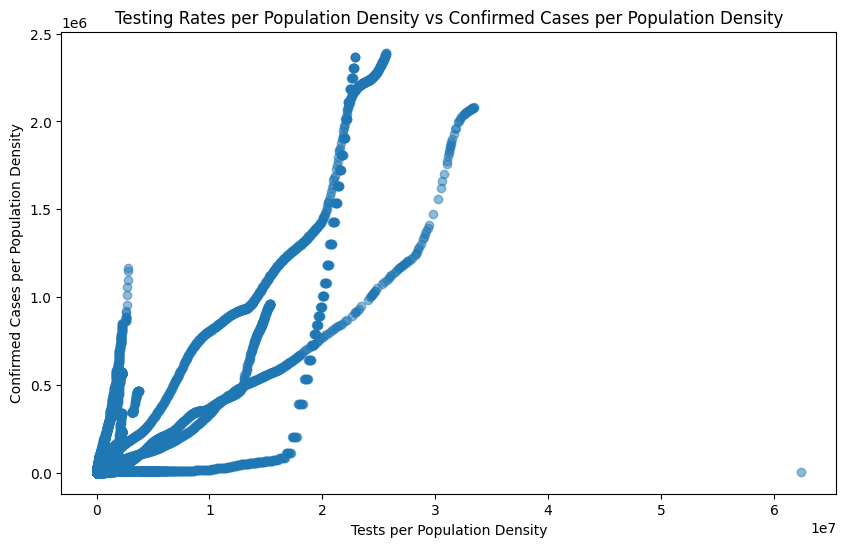

In [57]:
# Create a new DataFrame with relevant columns
testing_vs_cases = df_filtered[['location', 'total_tests', 'total_cases', 'population_density']].copy()

# Drop rows with missing values in 'total_tests', 'total_cases', or 'population_density'
testing_vs_cases = testing_vs_cases.dropna(subset=['total_tests', 'total_cases', 'population_density'])

# Normalize 'total_tests' and 'total_cases' by dividing by 'population_density'
testing_vs_cases['tests_per_density'] = testing_vs_cases['total_tests'] / testing_vs_cases['population_density']
testing_vs_cases['cases_per_density'] = testing_vs_cases['total_cases'] / testing_vs_cases['population_density']

# Plotting the scatter plot with normalized data using population density
plt.figure(figsize=(10, 6))
plt.scatter(testing_vs_cases['tests_per_density'], testing_vs_cases['cases_per_density'], alpha=0.5)
plt.title('Testing Rates per Population Density vs Confirmed Cases per Population Density')
plt.xlabel('Tests per Population Density')
plt.ylabel('Confirmed Cases per Population Density')
plt.show()


In [58]:
# time-lapse scatter plot, showing the evolution of total cases and deaths
# I didn't undrestand this part and couldnt analyze it !!????

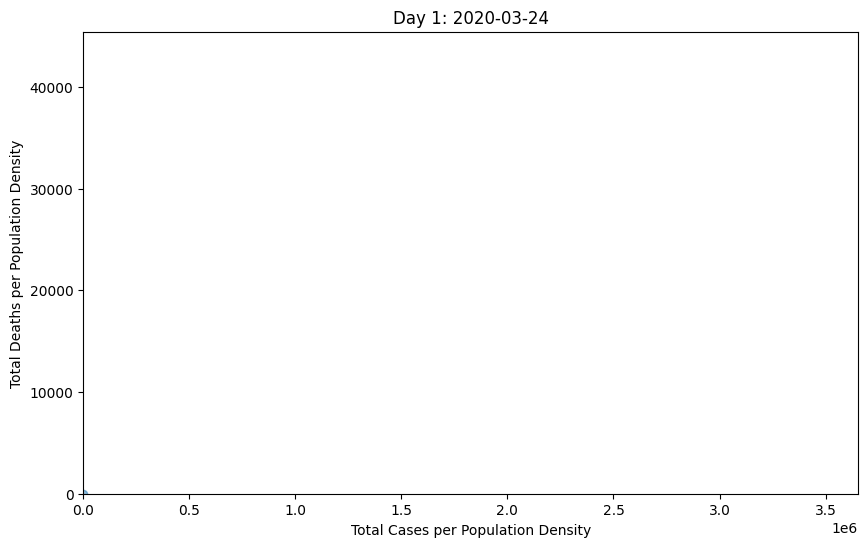

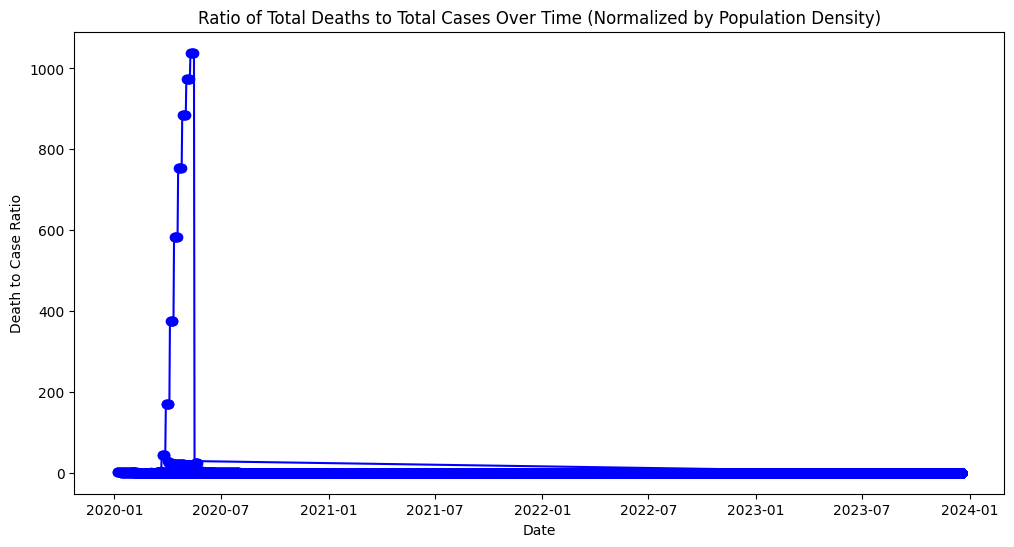

In [59]:
# Create a new DataFrame with relevant columns
time_lapse_data = df_filtered[['date', 'location', 'total_cases', 'total_deaths', 'population_density']].copy()

# Drop rows with missing values in 'total_cases', 'total_deaths', or 'population_density'
time_lapse_data = time_lapse_data.dropna(subset=['total_cases', 'total_deaths', 'population_density'])

# Normalize 'total_cases' and 'total_deaths' by dividing by 'population_density'
time_lapse_data['total_cases_per_density'] = time_lapse_data['total_cases'] / time_lapse_data['population_density']
time_lapse_data['total_deaths_per_density'] = time_lapse_data['total_deaths'] / time_lapse_data['population_density']

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, time_lapse_data['total_cases_per_density'].max())
ax.set_ylim(0, time_lapse_data['total_deaths_per_density'].max())
ax.set_xlabel('Total Cases per Population Density')
ax.set_ylabel('Total Deaths per Population Density')

# Function to update the scatter plot for each frame
def update(frame):
    subset_data = time_lapse_data.iloc[:frame + 1]
    ax.clear()  # Clear the axis for each frame
    ax.set_xlim(0, time_lapse_data['total_cases_per_density'].max())
    ax.set_ylim(0, time_lapse_data['total_deaths_per_density'].max())
    ax.set_xlabel('Total Cases per Population Density')
    ax.set_ylabel('Total Deaths per Population Density')
    scatter = ax.scatter(subset_data['total_cases_per_density'], subset_data['total_deaths_per_density'], alpha=0.5)
    ax.set_title(f'Day {frame + 1}: {subset_data.iloc[-1]["date"].strftime("%Y-%m-%d")}')
    return scatter,

# Create the animation
animation = FuncAnimation(fig, update, frames=len(time_lapse_data), interval=100, blit=True)

# Display the animation
plt.show()

# Analyze the ratio of total deaths to total cases over time
time_lapse_data['death_to_case_ratio'] = time_lapse_data['total_deaths_per_density'] / time_lapse_data['total_cases_per_density']

plt.figure(figsize=(12, 6))
plt.plot(time_lapse_data['date'], time_lapse_data['death_to_case_ratio'], marker='o', linestyle='-', color='b')
plt.title('Ratio of Total Deaths to Total Cases Over Time (Normalized by Population Density)')
plt.xlabel('Date')
plt.ylabel('Death to Case Ratio')
plt.show()


In [60]:
# analyze the ratio of total deaths to total cases over time

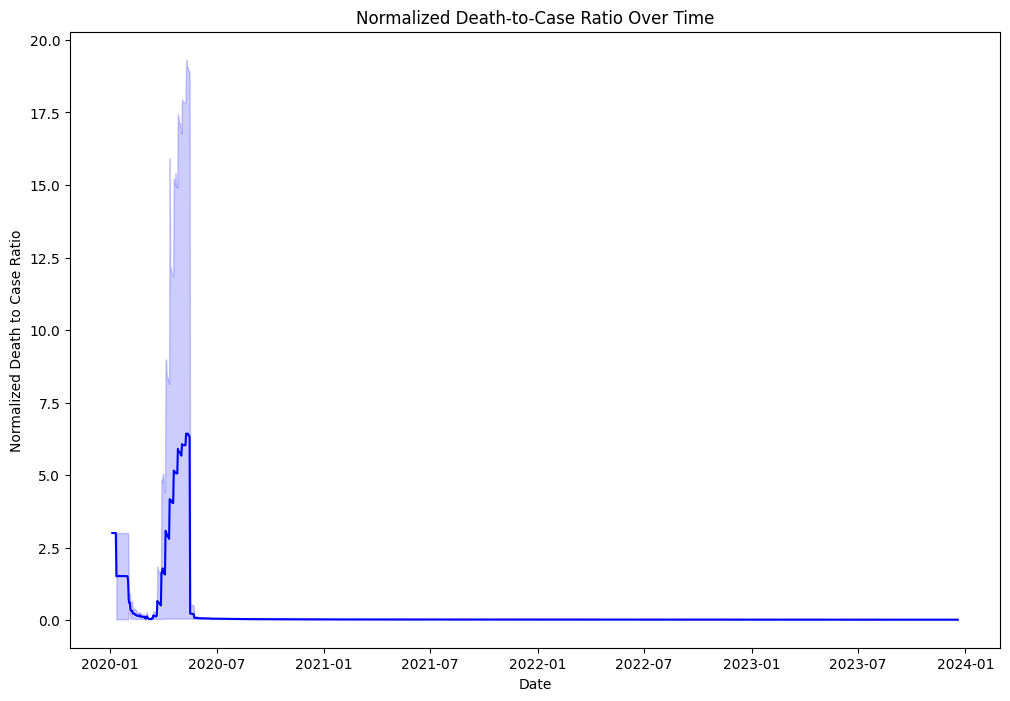

In [61]:
# Create a new DataFrame with relevant columns
ratio_data = df_filtered[['date', 'total_cases', 'total_deaths', 'population_density']].copy()

# Drop rows with missing values in 'total_cases', 'total_deaths', or 'population_density'
ratio_data = ratio_data.dropna(subset=['total_cases', 'total_deaths', 'population_density'])

# Normalize 'total_cases' and 'total_deaths' by dividing by 'population_density'
ratio_data['total_cases_per_density'] = ratio_data['total_cases'] / ratio_data['population_density']
ratio_data['total_deaths_per_density'] = ratio_data['total_deaths'] / ratio_data['population_density']

# Calculate the death-to-case ratio and normalize by population density
ratio_data['normalized_death_to_case_ratio'] = ratio_data['total_deaths_per_density'] / ratio_data['total_cases_per_density']

# Set up the figure and axis
plt.figure(figsize=(12, 8))
sns.lineplot(x='date', y='normalized_death_to_case_ratio', data=ratio_data, color='blue')

plt.title('Normalized Death-to-Case Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Death to Case Ratio')
plt.show()

In [62]:
# Daily new Deaths over time

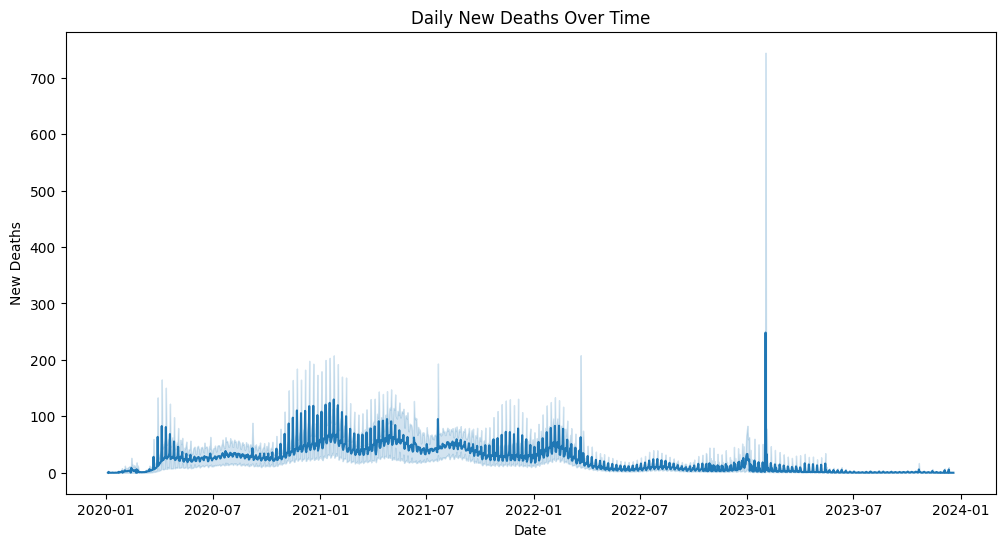

In [69]:
# Plot daily new deaths over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='new_deaths', data=df_filtered)
plt.title('Daily New Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.show()

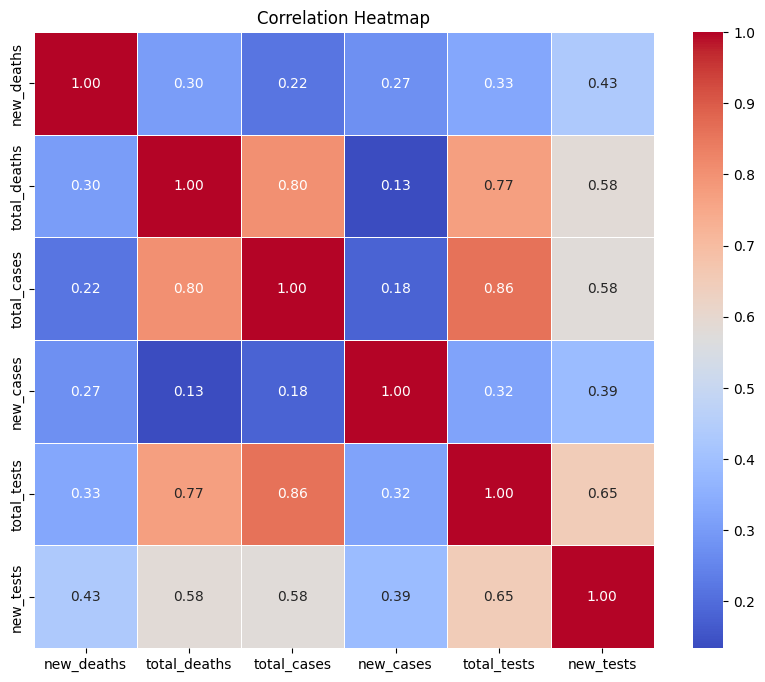

In [64]:
# Correlation heatmap
correlation_matrix = df_filtered[['new_deaths', 'total_deaths', 'total_cases', 'new_cases', 'total_tests', 'new_tests']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [65]:
# New cases 7 day Moving average

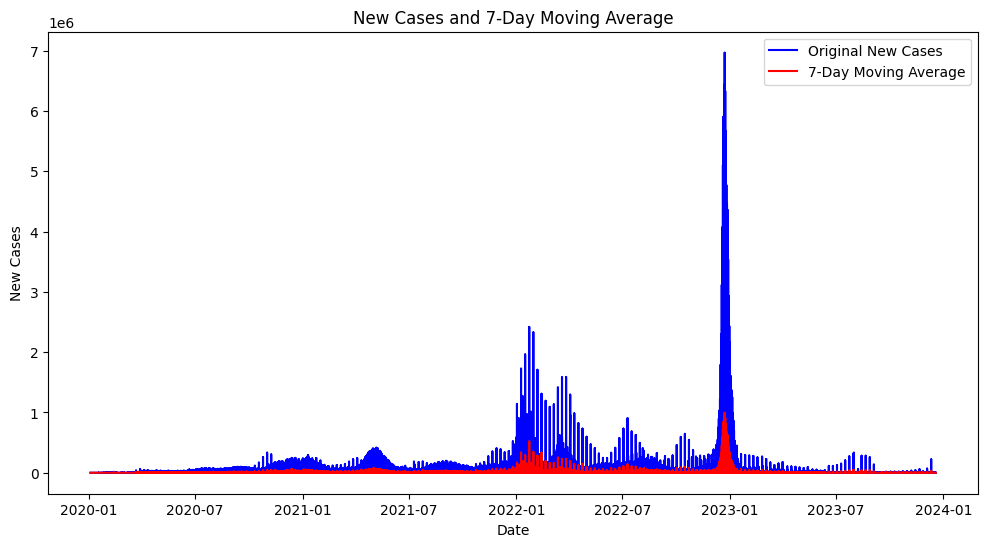

In [66]:
# Sort the DataFrame by 'date' for time-based calculations
covid_data = df_filtered.sort_values(by='date')

# Choose a window size for the moving average (e.g., 7 days)
window_size = 7

# Calculate the moving average for 'new_cases'
covid_data['new_cases_smoothed'] = covid_data['new_cases'].rolling(window=window_size, min_periods=1).mean()

# Plot the original 'new_cases' and the smoothed 'new_cases_smoothed'
plt.figure(figsize=(12, 6))
plt.plot(covid_data['date'], covid_data['new_cases'], label='Original New Cases', color='blue')
plt.plot(covid_data['date'], covid_data['new_cases_smoothed'], label=f'{window_size}-Day Moving Average', color='red')
plt.title(f'New Cases and {window_size}-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.show()
